# **Computer Lab 1 - Natural Language Processing**
### SD-TSIA 211

> Marina de Menezes Lima

> Gabriel Silva Vieira de Melo




In [ ]:
import numpy as np
from numpy import log, exp, sqrt, ravel
import scipy.sparse as sp
from scipy.linalg import norm, solve
from scipy.optimize import check_grad
import matplotlib.pyplot as plt
import time

# **Tikhonov regularization** 

## **Question 3.1**
\begin{equation}
f_1: (w_0, w) \mapsto \frac{1}{n}\sum_{i=1}^n log(1 + e^{-y_i(x_i^Tw + w_0)}) + \frac{\rho}{2}\|w\|_2^2
\end{equation}

where  $x_i \in \mathbb{R} ^p $,  $y_i \in \{-1,1\} $, $w \in \mathbb{R} ^p $ and $w_0 \in \mathbb{R}$

Calculating the gradient,

\begin{equation}
\nabla f_1(w_0,w) = 
\begin{pmatrix}
 \frac {\partial f_1}{\partial w_0}\\
 \frac {\partial f_1}{\partial w} 
\end{pmatrix} 
= 
\begin{pmatrix}
 \frac{1}{n}\sum_{i=1}^n\frac{-y_i e^{-y_i(x_i^T w +w_0)}}{1 + e^{-y_i(x_i^T w+w_0)}}\\
 \frac{1}{n}\sum_{i=1}^n\frac{-y_i e^{-y_i(x_i^T w+w_0)}x_i}{1 + e^{-y_i(x_i^T w+w_0)}} + \rho w
\end{pmatrix}
\end{equation}

So,

\begin{equation}
\nabla f_1(w_0,w) = 
\begin{pmatrix}
 \frac{1}{n}\sum_{i=1}^n\frac{-y_i}{1 + e^{y_i(x_i^T w+w_0)}}\\
 \frac{1}{n}\sum_{i=1}^n\frac{-y_i}{1 + e^{y_i(x_i^T w+w_0)}}x_i + \rho w
\end{pmatrix}
\in \mathbb{R}^{p+1}
\end{equation}

Calculating the Hessian Matrix 

\begin{equation}
\nabla ^2 f_1(w_0,w)= 
\begin{pmatrix}
    \frac {\partial^2 f_1}{\partial {w_0} ^2} &  \frac {\partial^2 f_1}{\partial w_0 \partial w}\\
    \frac {\partial^2 f_1}{\partial w \partial w_0} & \frac {\partial^2 f_1}{\partial w ^2} 
\end{pmatrix}
\end{equation}

\\

\begin{equation}
 \frac {\partial^2 f_1}{\partial {w_0} ^2} = \frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2} \in \mathbb{R} 
\end{equation}

\begin{equation}
  \frac {\partial^2 f_1}{\partial w_0 \partial w} = \frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2}{x_i}^T \in \mathbb{R}^{1 \times p}
\end{equation}

\begin{equation}
  \frac {\partial^2 f_1}{\partial w \partial w_0} = \frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2}x_i \in \mathbb{R}^{p \times 1}
\end{equation}

\begin{equation}
 \frac {\partial^2 f_1}{\partial w ^2} = \frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2}x_i{x_i}^T + \rho I \in \mathbb{R}^{p \times p}
\end{equation}

So,

\begin{equation}
\nabla ^2 f_1(w_0,w)=  \frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2}
\begin{pmatrix}
    1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
\end{pmatrix}
+
\begin{pmatrix}
    0 &  0 \\
    0 & \rho I
\end{pmatrix}
\end{equation}

\\

\begin{equation}
 \nabla ^2 f_1(w_0,w) \in \mathbb{R}^{p+1 \times p+1}
\end{equation}


To prove that the function $f_1$ is convex we need to show that the Hessian is a positive semi-definite matrix. 

\begin{equation}
  v^T\nabla ^2 f_1(w_0,w)v \geq 0, \forall v \in \mathbb{R}^{p+1}
\end{equation}

Since the Hessian is a sum of two matrix, we just have to prove that each matrix is positive semi-definite. To facilitate the demonstration, we are going to consider $v = (v_0, v_1, ..., v_{p-1}, v_p)^T$

\begin{equation}
  v^T
  \begin{pmatrix}
    0 &  0 \\
    0 & \rho I
  \end{pmatrix}v =\rho \sum_{i=1}^p {v_i}^2 \geq 0
\end{equation}

Hence, the matrix $\begin{pmatrix}
    0 &  0 \\
    0 & \rho I
  \end{pmatrix}$ is positive semi-definite

To finish, we need to prove that $  \frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2}
\begin{pmatrix}
    1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
\end{pmatrix}$ is a positive semi-definite matrix. 

Since $\frac{1}{n}\sum_{i=1}^n\frac{{y_i}^2 e^{-y_i(x_i^T w +w_0)}}{(1 + e^{-y_i(x_i^T w+w_0)})^2} \geq 0$, we only need to show that $\begin{pmatrix}
    1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
  \end{pmatrix}$ is positive semi-definite. 

\begin{equation}
  \begin{pmatrix}
    1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
  \end{pmatrix} 
  =
  \begin{pmatrix}
    1 & x_{i1} & ... & x_{ip} \\
    x_{i1} & {x_{i1}}^2 & ... & x_{i1}x_{ip}\\
    .\\
    .\\
    .\\
    x_{ip} & x_{ip}x_{i1} & ... & {x_{ip}}^2
  \end{pmatrix}
\end{equation}

We can conclude that $rank\left\{\begin{pmatrix}
    1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
  \end{pmatrix}\right\} = 1 $, because the matrix is composed by linear combinations of the first column. 

Since it is a rank 1 matrix, the trace operator is going to be equal to its unique eigenvalue ($\lambda$). 

\begin{equation}
tr \left\{
\begin{pmatrix}
  1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
\end{pmatrix}\right\} = \lambda = 1 + \sum_{k=1}^p{x_{ik}}^2 > 0
\end{equation}

So, the matrix $\begin{pmatrix}
  1 &  {x_i}^T \\
   x_i & x_i {x_i}^T
\end{pmatrix}$ is positive semi-definite. Consequently, the function $f_1(w_0,w)$ is indeed a convex function.

## **Question 3.2**

In [ ]:
def load_data(file_name_matrix='tfidf_matrix_97MB.npz', file_name_feature_names='feature_names_97MB.npy',
	      file_name_labels='train_labels.npy', samples_in_train_set=10000,
	      samples_in_test_set=137562):
	# Recuperation des donnees
	TF_IDF_matrix = sp.load_npz(file_name_matrix)
	TF_IDF_feature_names = np.load(file_name_feature_names)
	train_labels = np.load(file_name_labels, allow_pickle=True)
	train_labels_numeric = ((train_labels == 'Oui') + 0)

	X = TF_IDF_matrix[:samples_in_train_set].toarray()
	y = train_labels_numeric[:samples_in_train_set] * 2 - 1

	X_test = TF_IDF_matrix[samples_in_train_set:samples_in_train_set+samples_in_test_set].toarray()
	y_test = train_labels_numeric[samples_in_train_set:samples_in_train_set+samples_in_test_set] * 2 - 1


	# Standardisation des données
	std_X = np.maximum(np.std(X, axis=0), 1e-7)
	X = X / std_X
	X_test = X_test / std_X

	n = X.shape[0]
	n_test = X_test.shape[0]
	m = X.shape[1]

	# Ajout d'une colonne de uns
	eX = np.hstack((np.ones((n,1)), X))
	eX_test = np.hstack((np.ones((n_test,1)), X_test))

	return eX, y, eX_test, y_test, n, m, X

In [ ]:
def func(X, y, w, w0, rho,eX,eW):
  n,p = X.shape 
  v = [-1*y[i]*(np.dot(X[i],w) + w0) for i in range(n)]

  #f(x)
  val = np.mean(np.log(1 + np.exp(v))) + (rho/2)*np.linalg.norm(w,2)

  #gradient
  z = [(-y[i])/(1 + np.exp(-1*v[i])) for i in range(n)]
  grad_w0 = np.mean(z)
  
  z = [(-X[i]*y[i])/(1 + np.exp(-1*v[i])) for i in range(n)]
  grad_w = (1/n)*sum(z) + rho*w

  grad = np.append(grad_w0, grad_w)

  #hessian matrix
  v = np.exp( y*(eX.dot(eW)))
  h = 1/n * sum( v[i] / ((1+ v[i])**2) * ( np.reshape(eX[i,:],(p+1,1)).dot(np.reshape(eX[i,:],(1,p+1))) ) for i in range(n) )  
  A = np.identity(p+1)
  A[0,0] = 0
  hessian = h + rho * A

  return val, grad, hessian

In [ ]:
eX, y, eX_test, y_test, n, p, X = load_data()

In [ ]:
rho = 1/n
w0 = 0
w = np.zeros(p)
eW = np.append(w0,w)
val, grad, hessian = func(X, y, w, w0, rho, eX, eW)

print("The value of the function is: ", val)

The value of the function is:  0.6931471805599453


In [ ]:
X, y, w, w0, rho, eX, eW
def function(eW):
  val, grad, hessian = func(X, y, w, w0, rho, eX, eW)
  return val

def gradient(eW):
  val, grad, hessian = func(X, y, w, w0, rho, eX, eW)
  return grad

In [ ]:
print(check_grad(function, gradient, eW))

## **Question 3.3**

In [ ]:
def newton(X, y, w, w0, rho, eX, eW, stop):
  val, grad, hes = func(X, y, w, w0, rho, eX, eW)
  
  norm = np.linalg.norm(grad[1:])
  v = [norm]
  
  k = 0
  while(norm >= stop):
    W = np.append(w0, w) - np.linalg.solve(hes, grad)
    w0 = W[0]
    w = W[1:]

    val, grad, hes = func(X, y, w, w0, rho, eX, eW)
    norm = np.linalg.norm(grad[1:])
    v.append(norm)

    k = k + 1

  plt.figure()  
  plt.plot(v)
  plt.yscale("log")
  plt.xlabel("Iterations")
  plt.ylabel("Norm of the gradient")
  plt.show()

  print("Value of the function:", val)
  print("Number of iterations:", k)

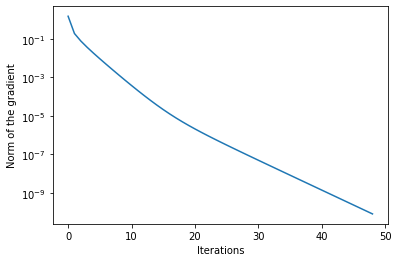

Value of the function: 0.56806352992635
Number of iterations: 48


In [ ]:
newton(X, y, np.zeros(p), 0, rho, eX, eW, 10**-10)

## **Question 3.4**

In [ ]:
newton(X, y, np.ones(p), 1, rho, eX, eW, 10**-10)

We found that using a initial point $(w^0_0, w^0)$ = e where $e_i = 1$ for all $i$, the program overflows.

## **Question 3.5**

In [ ]:
def function(eW):
  w = eW[1:]
  w0 = eW[0]
  val, grad, hessian = func(X, y, w, w0, rho, eX, eW)
  return val

def armijo(W, function, grad, hg, a, b):
    k = 1.0
    beta = 0.5
    gamma = b * (a**k)

    while (function(W - gamma * hg) > function(W) - beta * gamma * np.sum(grad * hg)):
        k = k + 1.0
        gamma = b * (a**k)

    return gamma

def newton_armijo(func, X, y, w, w0, rho, eX, eW, stop, max):

  val, grad, hes = func(X, y, w, w0, rho, eX, eW)
  hg = np.linalg.solve(hes, grad)

  norm = np.linalg.norm(grad[1:])
  v = [norm]

  k = 0
  a = 0.5
  gamma = 0.5

  while(norm > stop and k < max):
      gamma = armijo(eW, function, grad, hg, a, 2 * gamma)
      W = np.append(w0, w) - gamma * hg
      w0 = W[0]
      w = W[1:]

      val, grad, hes = func(X, y, w, w0, rho, eX, eW)
      hg = np.linalg.solve(hes, grad)

      norm = np.linalg.norm(grad[1:])
      v.append(norm)
      k = k + 1

  plt.figure()  
  plt.plot(v)
  plt.xlabel("Iterations")
  plt.ylabel("Norm of the gradient")
  plt.show()

  print("Value of the function:", val)
  print("Number of iterations:", k)

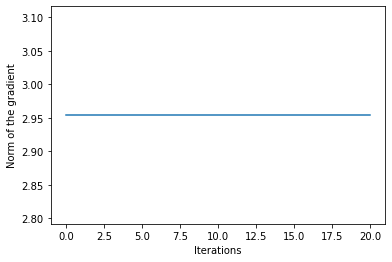

Value of the function: 62.949539862951966
Number of iterations: 20


In [ ]:
newton_armijo(func, X, y, np.ones(p), 1, rho, eX, eW, 10**-10, 20)

# **Regularization for a sparse model** 

## **Question 4.1**

\begin{equation}
min \; \frac{1}{n}\sum_{i=1}^n log(1 + e^{-y_i(x_i^Tw + w_0)}) + \rho\|w\|_1
\end{equation}

\begin{equation}
\|w\|_1 = \sum_{i=1}^p |w_i| \implies \textrm{$\|w\|_1$ is not $C^{1}$}
\end{equation}

We only can use Newton's Method if the function is three times continuously differentiable. In this case, since $\|w\|_1$ is not differentiable, we cannot use Newton's Method.

## **Question 4.2**
Let
\begin{equation}
F_2 = \frac{1}{n}\sum_{i=1}^n log(1 + e^{-y_i(x_i^Tw + w_0)}) + \rho\|w\|_1 = f_2  + g_2
\end{equation}be an objective function such that $f_2$ is differentiable and the proximal operator of $g_2$ is easy to compute. So, we get: 

\begin{equation}
f_2 = \frac{1}{n}\sum_{i=1}^n log(1 + e^{-y_i(x_i^Tw + w_0)})
\end{equation}

\begin{equation}
g_2 = \rho\|w\|_1
\end{equation}

Calculating the proximal operator of $g_2$,

Since $g_2 = \rho\sum_{i=1}^p |w_i| $, we can say that $g_2$ is a separable function. 

\begin{equation}
prox_{g_2}(w) = argmin_{y\in\mathbb{R}^p} \; g_2(y) + \frac{1}{2} \| w- y\|_2 ^2 = argmin_{y\in\mathbb{R}^p} \; \sum_{i=1}^p \rho|y_i| + \frac{1}{2} (w_i - y_i) ^2
\end{equation}

Consequently,
\begin{equation}
prox_{g_2}(w) = 
\begin{pmatrix}
 prox_{{g_2}_1}(w_1)\\
 .\\
 .\\
 .\\
 prox_{{g_2}_p}(w_p)
\end{pmatrix}  
\end{equation}

\\

\begin{equation}
  prox_{{g_2}_i}(w_i) =  S_{\rho}(w_i) =
  \begin{cases}
  w_i - \rho, \; w_i > \rho \\
  0, \; w_i \in [-\rho,\rho]\\
  w_i + \rho, \; w_i < -\rho
  \end{cases}
\end{equation}

\\

\begin{equation}
prox_{g_2}(w) = 
\begin{pmatrix}
 S_{\rho}(w_1)\\
 .\\
 .\\
 .\\
 S_{\rho}(w_p)
\end{pmatrix} 
\end{equation}

Calculating the gradient of $f_2$,

\begin{equation}
\nabla f_2(w_0,w) =
\begin{pmatrix}
 \frac {\partial f_2}{\partial w_0}\\
 \frac {\partial f_2}{\partial w} 
\end{pmatrix}  
=
\begin{pmatrix}
 \frac{1}{n}\sum_{i=1}^n\frac{-y_i}{1 + e^{y_i(x_i^T w+w_0)}}\\
 \frac{1}{n}\sum_{i=1}^n\frac{-y_i}{1 + e^{y_i(x_i^T w+w_0)}}x_i 
\end{pmatrix}
\in \mathbb{R}^{p+1}
\end{equation}